# Exploring Leading Economic Indicators

#### Notebook Structure

1. [ISM Reports for the US Manufacturing and Services Sectors](#1-ism-pmi-reports-for-the-us-manufacturing-and-services-sectors)
2. [University of Michigan Consumer Sentiment](#2-university-of-michigan-consumer-sentiment)
3. [U.S. Census Bureau's Building Permits Survey](#3-us-census-bureaus-building-permits-survey)
4. [European Economic Sentiment](#4-european-economic-sentiment)
5. [Caixin Manufacturing and Services PMI](#5-caixin-manufacturing-and-services-pmi)
6. [Market Data Snapshot from Trading Economics](#6-market-data-snapshot-from-trading-economics)
7. [Industry and Stock-Level Data from FinViz](#7-industry-and-stock-level-data-from-finviz)

#### Import Modules

In [135]:
from scrapers import *
from IPython.display import display, Markdown
from matplotlib import colors, pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl.worksheet.header_footer') # ignore warnings for excel header/footer

## 1. ISM PMI Reports for the US Manufacturing and Services Sectors

The [ISM PMI (Purchasing Managers' Index) reports](https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/) are economic indicators published monthly by the Institute for Supply Management (ISM). These reports provide insights into the health of the manufacturing and non-manufacturing (services) sectors of the U.S. economy. The reports are based on surveys of purchasing and supply executives, and a reading above 50 indicates expansion, while a reading below 50 indicates contraction.

The ISM PMI reports are closely watched by investors, economists, and policymakers as they can influence market sentiment and potentially impact investment decisions. 

#### Getting Data from the ISM Manufacturing Report

The following are sections of the ISM manufacturing report, accessible as attributes of the ism_man object:

In [ ]:
ism_man = IsmReport.download_manufacturing()

display([i for i in ism_man.__dict__.keys()])

['_headline', '_highlights', '_overview', '_comments', '_full_pmi_table', '_comm_price_up', '_comm_price_down', '_comm_supply_short', '_index_summary', '_new_orders_text', '_new_orders_table', '_production_text', '_production_table', '_employment_text', '_employment_table', '_supplier_deliveries_text', '_supplier_deliveries_table', '_inventories_text', '_inventories_table', '_customer_inventories_text', '_customer_inventories_table', '_prices_text', '_prices_table', '_backlog_orders_text', '_backlog_orders_table', '_export_orders_text', '_export_orders_table', '_imports_text', '_imports_table', '_buying_policy_text', '_buying_policy_table', '_industry_rankings', '_respondents']


The "download_manufacturing()" method gets the latest report by default. For a specific report, a URL may be passed as an argument.
Below are some sections from the report.

In [ ]:
display(Markdown(f'**<p align="center">{ism_man.headline}</p>**'))
overview_text = ism_man.overview
display(overview_text.replace('\n', '\n\n'))
display(ism_man.full_pmi_table)

display(Markdown(f'**<p align="center">Comments from Industry</p>**'))
comments_df = ism_man.respondents
for sector, comment in zip(comments_df.index, comments_df.iloc[:, 0]):
    if not comment: continue
    display(Markdown(f'_{sector}_:\n{comment}\n'))

**<p align="center">Manufacturing PMI® at 49%</p>**

(Tempe, Arizona) — Economic activity in the manufacturing sector contracted in June for the fourth consecutive month, following a two-month expansion preceded by 26 straight months of contraction, say the nation's supply executives in the latest Manufacturing ISM® Report On Business®.

The report was issued today by Susan Spence, MBA, Chair of the Institute for Supply Management® (ISM®) Manufacturing Business Survey Committee:

“The Manufacturing PMI® registered 49 percent in June, a 0.5-percentage point increase compared to the 48.5 percent recorded in May. The overall economy continued in expansion for the 62nd month after one month of contraction in April 2020. (A Manufacturing PMI® above 42.3 percent, over a period of time, generally indicates an expansion of the overall economy.) The New Orders Index contracted for the fifth month in a row following a three-month period of expansion; the figure of 46.4 percent is 1.2 percentage points lower than the 47.6 percent recorded in May. T

,Series Index Jun,Series Index May,Percentage Point Change,Direction,Rate of Change,Trend (Months)
Index,,,,,,
Manufacturing PMI®,49.0,48.5,0.5,Contracting,Slower,4.0
New Orders,46.4,47.6,-1.2,Contracting,Faster,5.0
Production,50.3,45.4,4.9,Growing,From Contracting,1.0
Employment,45.0,46.8,-1.8,Contracting,Faster,5.0
Supplier Deliveries,54.2,56.1,-1.9,Slowing,Slower,7.0
Inventories,49.2,46.7,2.5,Contracting,Slower,2.0
Customers’ Inventories,46.7,44.5,2.2,Too Low,Slower,9.0
Prices,69.7,69.4,0.3,Increasing,Faster,9.0
Backlog of Orders,44.3,47.1,-2.8,Contracting,Faster,33.0


**<p align="center">Comments from Industry</p>**

_Chemical Products_:
The biopharmaceutical space is starting to see more pronounced headwinds: Stock prices have significantly eroded, companies are facing hiring freezes, and so on.


_Computer & Electronic Products_:
Tariffs continue to cause confusion and uncertainty for long-term procurement decisions. The situation remains too volatile to firmly put such plans into place.


_Fabricated Metal Products_:
Business has notably slowed in last four to six weeks. Customers do not want to make commitments in the wake of massive tariff uncertainty.


_Food, Beverage & Tobacco Products_:
Tariff volatility has impacted machinery, steel and specialized components. Also, potential shortages of skilled labor for construction, maintenance and installation.


_Machinery_:
The tariff mess has utterly stopped sales globally and domestically. Everyone is on pause. Orders have collapsed.


_Miscellaneous Manufacturing_:
The geopolitical environment remains volatile: (1) ongoing shifts in U.S. tariff policy make it difficult to plan, (2) emerging conflicts in the Middle East could pose long-term commodity risks and (3) China measures on rare earth materials are causing challenges. Overall outlook for our company is positive; it’s just extremely hard to make near-term supply plans/strategies or budgets.


_Petroleum & Coal Products_:
Tariffs continue to impact material pricing.


_Primary Metals_:
Tariffs, chaos, sluggish economy, rising prices, Ukraine, Iran, geopolitical unrest around the world — all make for a landscape that is hellacious, and fatigue is setting in due to dealing with these issues across the spectrum. Unfortunately, this is just the beginning unless something drastically changes, but the supply chain implications will grow — depots will not be stocked, less material will be available, and it will take years for domestic production to handle the needs (if companies even want to).


_Transportation Equipment_:
The word that best describes the current market outlook is ‘uncertainty.’ The erratic trade policy with on-again/off-again tariffs has led to price uncertainty for customers, who appear to be prepared to hold off large capital purchases until stability returns. This has resulted in further reductions in customer demand and softening sales for the balance of 2025. Operations has planned additional weeks of downtime at multiple plants to accommodate reduced orders. Next year’s forecast is not any better at this point. Additionally, most electric vehicle (EV) projects have been delayed or canceled, resulting in a significant amount of unutilized capital investment. EV technology launches for 2026-28 have been delayed past 2030.


_Wood Products_:
Middle East unrest as well as unstable long-term tariff positions continue to impact second- and third-tier sources, which is applying pressure to material costs. Costs are up 6 percent to 10 percent over budgeted inflation — and the forecast accounted for the volatility expected with the current administration.


The process for obtaining the ISM services report is identical. Only the sectors and a few attributes differ between _ManufactingPmi_ and _ServicesPmi_ objects

In [138]:
ism_serv = IsmReport.download_services()

display(Markdown(f'**<p align="center">{ism_serv.headline}</p>**'))
display(ism_serv.full_pmi_table)

display(Markdown(f'**<p align="center">Comments from Industry</p>**'))
comments_df = ism_serv.respondents
for sector, comment in zip(comments_df.index, comments_df.iloc[:, 0]):
    if not comment: continue
    display(Markdown(f'_{sector}_:\n{comment}\n'))

**<p align="center">Services PMI® at 50.8%</p>**

Services PMI®                   \
                              Series Index Jun Series Index May   
Index                                                             
Services PMI®                             50.8             49.9   
Business Activity/ Production             54.2             50.0   
New Orders                                51.3             46.4   
Employment                                47.2             50.7   
Supplier Deliveries                       50.3             52.5   
Inventories                               52.7             49.7   
Prices                                    67.5             68.7   
Backlog of Orders                         42.4             43.4   
New Export Orders                         51.1             48.5   
Imports                                   51.7             48.2   
Inventory Sentiment                       57.1             62.9   
Customers' Inventories                     N/A              N/A   
Overall Economy                                                   
Services Sector                                                   

                                                                 \
                              Percent Point Change    Direction   
Index                                                             
Services PMI®                                  0.9      Growing   
Business Activity/ Production                  4.2      Growing   
New Orders                                     4.9      Growing   
Employment                                    -3.5  Contracting   
Supplier Deliveries                           -2.2      Slowing   
Inventories                                    3.0      Growing   
Prices                                        -1.2   Increasing   
Backlog of Orders                             -1.0  Contracting   
New Export Orders                              2.6      Growing   
Imports                                        3.5      Growing   
Inventory Sentiment                           -5.8     Too High   
Customers' Inventories                         N/A          N/A   
Overall Economy                                         Growing   
Services Sector                                         Growing   

                                                                \
                                 Rate of Change Trend (Months)   
Index                                                            
Services PMI®                  From Contracting            1.0   
Business Activity/ Production    From Unchanged            1.0   
New Orders                     From Contracting            1.0   
Employment                         From Growing            1.0   
Supplier Deliveries                      Slower            7.0   
Inventories                    From Contracting            1.0   
Prices                                   Slower           97.0   
Backlog of Orders                        Faster            4.0   
New Export Orders              From Contracting            1.0   
Imports                        From Contracting            1.0   
Inventory Sentiment                      Slower           26.0   
Customers' Inventories                      N/A            N/A   
Overall Economy                          Faster           61.0   
Services Sector                From Contracting            1.0   

                              Manufacturing PMI®                   \
                                Series Index Jun Series Index May   
Index                                                               
Services PMI®                               49.0             48.5   
Business Activity/ Production               50.3             45.4   
New Orders                                  46.4             47.6   
Employment                                  45.0             46.8   
Supplier Deliveries                         54.2             56.1   
Inventories                                 49.2             46.7   
Prices   

**<p align="center">Comments from Industry</p>**

_Accommodation & Food Services_:
Restaurant sales and traffic remain flat to prior year. Staffing is adequate for our current needs, and no supply chain concerns this month.


_Agriculture, Forestry, Fishing & Hunting_:
Increased cost from tariffs and the potential for tariffs is impacting cost increases. Higher cost of high-dollar items like 150-horsepower farm tractors are forcing farmers to delay purchasing or purchase used equipment. Tension in the Middle East is creating great concern and uncertainty.


_Construction_:
Sales remain stubbornly slow due to affordability issues with higher mortgage rates and high property values. Residential construction has embarked on cost-cutting measures through value engineering, supplier margin reductions and layoffs.


_Health Care & Social Assistance_:
Prices have gone up from tariff recovery fees — separate line items — but the supply chain, deliveries and inventories have remained mostly stable after the initial disruption. Costs continue to increase across the board, so our goal is to mitigate that.


_Information_:
General uncertainty around the economy continues to drive increases in prices. Also, lots of SaaS (software-as-a-service) vendors are using the AI (artificial intelligence) boom to restructure pricing and products, resulting in massive increases.


_Other Services_:
After several slow months, business is starting to increase. New requests are going out to suppliers.


_Professional, Scientific & Technical Services_:
Confidence in a predictable economic environment has eroded to a point where capital investments are being severely curtailed.


_Real Estate, Rental & Leasing_:
Business growth is slow. Global economic conditions impacted by U.S. tariffs are creating significant uncertainty, which is holding businesses back from making short- to medium-term business decisions.


_Utilities_:
Lead times are extending in the past month or two. Seeing high-single- or low-double-digit percent increases in pricing on metals related to commodity hardware and products.


_Wholesale Trade_:
Business seems to be picking up. Many of the macroeconomic factors that were concerning look to be playing out in our favor. High interest rates are still a problem. Supplies are ample for current business levels.


## 2. University of Michigan Consumer Sentiment[](#2-university-of-michigan-consumer-sentiment)

The [University of Michigan Consumer Sentiment Index (MCSI)](https://www.sca.isr.umich.edu/) is a monthly survey that measures how optimistic or pessimistic US consumers are about the economy. It gauges their attitudes towards personal finances, business conditions, and overall economic activity. The index is based on interviews conducted by the University of Michigan's Institute for Social Research.

Consumer spending is a major driver of the US economy, and the MCSI is considered a leading indicator of future economic activity. 

The MCSI is composed of the Index of Current Economic Conditions (which reflects current financial situations) and the Index of Consumer Expectations (which reflects future outlook). A value of greater than 80 indicates bullish sentiment, whereas below 70 indicates bearish sentiment. 

#### Getting Data from the Consumer Survey

In [139]:
consumer = ConsumerSurvey.download()
display(Markdown(f'**MCSI Current and Future Expectations**'))
display(consumer.table)

**MCSI Current and Future Expectations**

,Year,Month,Index,Current Index,Expected Index
0,2024,6,68.2,65.9,69.6
1,2024,7,66.4,62.7,68.8
2,2024,8,67.9,61.3,72.1
3,2024,9,70.1,63.3,74.4
4,2024,10,70.5,64.9,74.1
5,2024,11,71.8,63.9,76.9
6,2024,12,74.0,75.1,73.3
7,2025,1,71.7,75.1,69.5
8,2025,2,64.7,65.7,64.0
9,2025,3,57.0,63.8,52.6


## 3. U.S. Census Bureau's Building Permits Survey

The [U.S. Census Bureau's Building Permits Survey (BPS)](https://www.census.gov/construction/nrc/current/index.html) is a monthly survey that collects data on new privately-owned residential construction. It's a key economic indicator, providing statistics on the number of housing units authorized by building permits, and the valuation of those permits, at national, state, and local levels. This data is vital for understanding the health and direction of the housing market and the broader economy. 

#### Getting Data from the Building Permits Survey

In [140]:
build = ConstructionSurvey.download()
display(Markdown(f'**US Census Bureau Construction Survey Data**'))
display(build.table.tail())

**US Census Bureau Construction Survey Data**

,Year,Month,Permits,Authorized,Starts,Under Construction,Completions
792,2025,1,1460.0,283.0,1358.0,1402.0,1651.0
793,2025,2,1454.0,277.0,1490.0,1408.0,1565.0
794,2025,3,1481.0,268.0,1355.0,1401.0,1566.0
795,2025,4,1422.0,276.0,1392.0,1394.0,1448.0
796,2025,5,1394.0,282.0,1256.0,1375.0,1526.0


_In future, plotting methods may be built-into to the ConstructionSurvey class to allow easy visualisation of trends:_

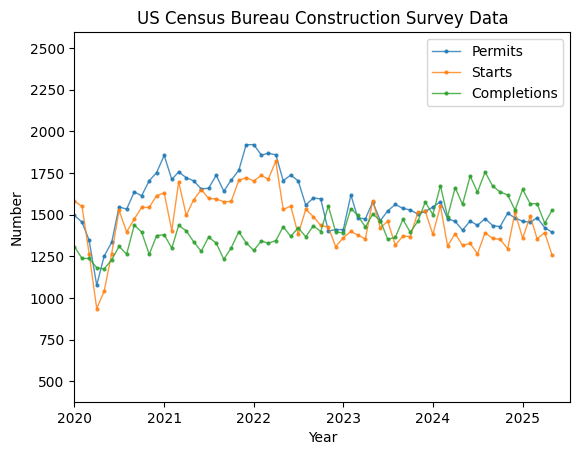

In [141]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = build.table
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

fig, ax = plt.subplots()
ax.plot(dates, df['Permits'], label='Permits', **line_settings)
ax.plot(dates, df['Starts'], label='Starts', **line_settings)
ax.plot(dates, df['Completions'], label='Completions', **line_settings)

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('US Census Bureau Construction Survey Data')
ax.legend()

plt.show()

## 4. European Economic Sentiment

The [European Economic Sentiment Indicator (ESI)](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/business-and-consumer-surveys_en) is a composite measure that tracks economic confidence in the EU and euro area. It's a weighted average of confidence indicators from five key sectors: industry, services, consumers, retail trade, and construction. The ESI is used to gauge overall economic sentiment and its fluctuations, with values above 100 indicating above-average sentiment and values below 100 indicating below-average sentiment. 

#### Getting Data from the European Economic Sentiment Surveys

In [142]:
euro = EuroSurvey.download()
display(Markdown(f'**EU Economic Sentiment Indicator and Components**'))
display(euro.table.tail())

**EU Economic Sentiment Indicator and Components**

,Year,Month,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI,EU.EEI,EA.INDU,...,RS.BUIL,RS.ESI,RS.EEI,TR.INDU,TR.SERV,TR.CONS,TR.RETA,TR.BUIL,TR.ESI,TR.EEI
481,2025,2,-10.2,5.9,-12.9,-3.5,-5.9,96.9,98.4,-11.1,...,-4.9,95.9,101.3,-1.8,21.1,-18.4,13.5,-10.6,97.1,99.8
482,2025,3,-10.0,3.9,-13.9,-5.4,-5.8,95.9,97.7,-10.7,...,-2.2,94.1,100.3,-0.2,20.2,-14.6,11.8,-11.1,99.1,97.6
483,2025,4,-10.5,2.9,-15.9,-7.1,-5.7,94.5,96.9,-11.1,...,-7.9,92.5,98.4,-1.0,17.2,-16.5,10.4,-14.6,95.9,94.7
484,2025,5,-10.5,2.8,-14.5,-5.8,-5.3,95.0,97.5,-10.4,...,-5.4,90.4,97.8,-2.5,18.4,-15.5,11.9,-11.8,96.3,93.5
485,2025,6,-11.6,3.0,-14.8,-6.3,-4.6,94.0,97.5,-12.0,...,-6.2,87.7,92.6,-2.2,19.3,-15.2,9.6,-13.3,96.6,92.4


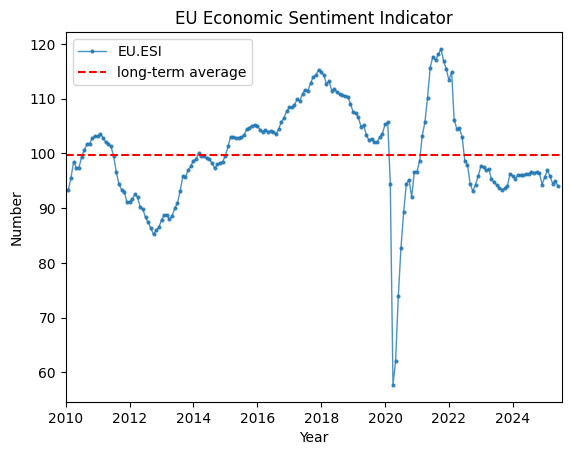

In [144]:
region = 'EU'
sector = 'ESI'
start_date = datetime(2010, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = euro.table
df = df[['Year', 'Month', f'{region}.{sector}']].dropna()
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
series = df[f'{region}.{sector}']

fig, ax = plt.subplots()
ax.plot(dates, series, label=f'{region}.{sector}', **line_settings)
ax.hlines(series.mean(), start_date, end_date, label='long-term average', colors='r', linestyles='dashed')

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title(f'EU Economic Sentiment Indicator')
ax.legend()

plt.show()

## 5. Caixin Manufacturing and Services PMI

The Caixin PMI (Purchasing Managers' Index) is a monthly indicator of the economic health of China's [manufacturing](https://tradingeconomics.com/china/manufacturing-pmi) and [services](https://tradingeconomics.com/china/manufacturing-pmi) sectors, specifically focusing on the private sector. Readings above 50 indicate expansion, while those below 50 suggest contraction. The Caixin PMI is closely watched by policymakers and traders as it provides early insights into the performance of Chinese businesses. 

#### Getting Data from the Caixin Manufacturing and Services PMI

In [145]:
caixin = CaixinPmi.download()
display(Markdown(f'**Caixin Manufacturing PMI**'))
display(caixin.manufacturing_table)

display(Markdown(f'**Caixin Services PMI**'))
display(caixin.services_table)

**Caixin Manufacturing PMI**

,Year,Month,Manufacturing PMI
0,2025,4,50.4
1,2025,5,48.3
2,2025,6,50.4


**Caixin Services PMI**

,Year,Month,Services PMI
0,2025,4,50.7
1,2025,5,51.1
2,2025,6,50.6


## 6. Market Data Snapshot from Trading Economics

[Trading Economics](https://tradingeconomics.com/commodities) provides a wealth of data related to the global economy in powerful formats. The classes and functions used below are written for the convenience of carrying out custom computations/visualizations with the data.

#### Getting Market Data from Trading Economics

_The MarketData object has 5 attributes shown below. Each attribute is a named tuple containing multiple fields. Each of those fields contain a Pandas Dataframe as value._

In [146]:
market = MarketData.download()
display([i for i in market.__dict__.keys()])

['_commodities', '_stocks', '_bonds', '_currencies', '_crypto']

In [147]:
display(Markdown(f'**Commodities**'))
display(market.commodities.all)

display(Markdown(f'**Commodities - Energy Only**'))
display(market.commodities.energy)

**Commodities**

,Item,Category,Unit,Price,Day %,Weekly %,Monthly %,YTD %,YoY %,Date
0,Crude Oil,Energy,USD/Bbl,67.587,-1.26,-0.51,-3.79,-5.76,-17.49,Jul/14
1,Brent,Energy,USD/Bbl,69.647,-1.01,0.1,-4.89,-6.69,-17.92,Jul/14
2,Natural gas,Energy,USD/MMBtu,3.4422,3.87,0.89,-8.16,-5.25,59.51,Jul/14
3,Gasoline,Energy,USD/Gal,2.1667,-1.11,0.74,-3.22,7.67,-13.06,Jul/14
4,Heating Oil,Energy,USD/Gal,2.4023,-1.84,-0.32,-1.89,3.67,-4.31,Jul/14
...,...,...,...,...,...,...,...,...,...,...
88,United Kingdom,Electricity,GBP/MWh,75.9,0.93,4.76,-3.19,-25.92,17.22,Jul/11
89,Germany,Electricity,EUR/MWh,86.0,-0.89,2.38,31.52,-25.69,30.4,Jul/11
90,France,Electricity,EUR/MWh,65.31,-0.31,3.5,-1.34,-6.5,-11.02,Jul/14
91,Spain,Electricity,EUR/MWh,84.2,-14.3,39.5,60.81,-38.02,56.07,Jul/14


**Commodities - Energy Only**

,Energy,Unit,Price,Day %,Weekly %,Monthly %,YTD %,YoY %,Date
0,Crude Oil,USD/Bbl,67.587,-1.26,-0.51,-3.79,-5.76,-17.49,Jul/14
1,Brent,USD/Bbl,69.647,-1.01,0.1,-4.89,-6.69,-17.92,Jul/14
2,Natural gas,USD/MMBtu,3.4422,3.87,0.89,-8.16,-5.25,59.51,Jul/14
3,Gasoline,USD/Gal,2.1667,-1.11,0.74,-3.22,7.67,-13.06,Jul/14
4,Heating Oil,USD/Gal,2.4023,-1.84,-0.32,-1.89,3.67,-4.31,Jul/14
5,Coal,USD/T,112.0,0.9,1.86,7.07,-10.58,-16.32,Jul/11
6,TTF Gas,EUR/MWh,35.29,-0.77,3.37,-6.86,-30.06,11.38,Jul/14
7,UK Gas,GBp/thm,84.624,-0.76,4.7,-4.78,-32.51,15.98,Jul/14
8,Ethanol,USD/Gal,1.735,-0.29,0.29,4.83,2.66,-9.64,Jul/11
9,Naphtha,USD/T,557.42,1.24,0.44,0.61,-8.84,-19.95,Jul/11


_In future, a method may be built into the MarketData class to allow preset plots to be generated. Below is a visualization of the YoY % price changes across various commodities:_

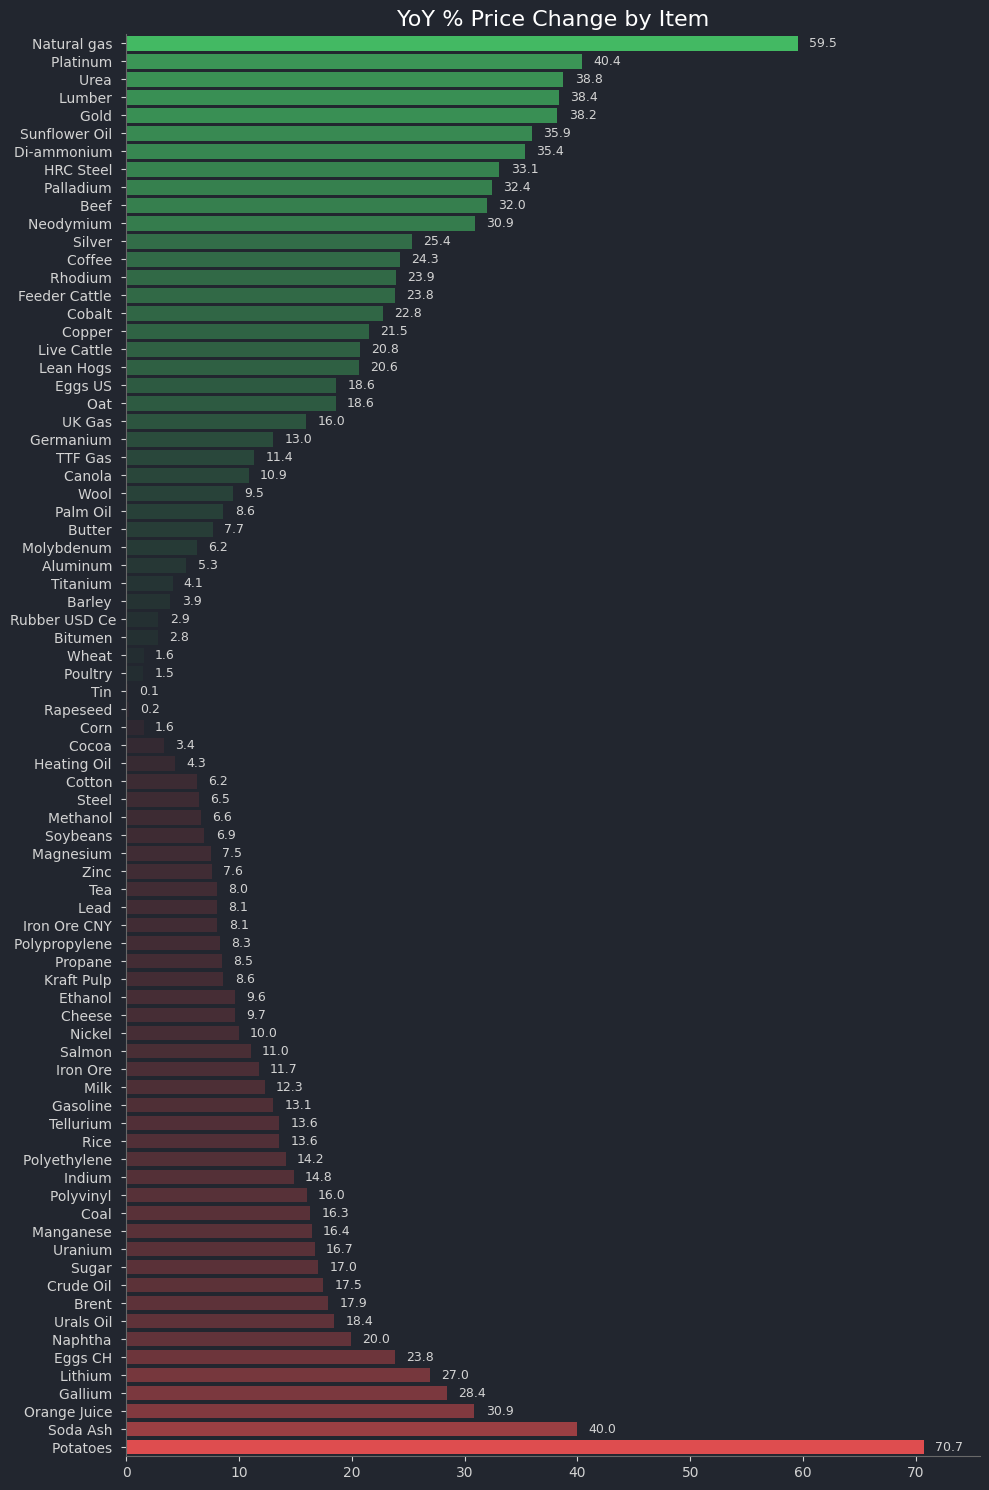

In [148]:
# Prepare x and y data
df = market.commodities.all.copy()
df = df[['Item', 'YoY %']][(df['Category'] != 'Index') & (df['Category'] != 'Electricity')]
df_sorted = df.sort_values(by='YoY %', ascending=False, ignore_index=True)
x = df_sorted['YoY %']
y = df_sorted['Item']

# Define colors
background_color = '#22262F'
pos_bar_color = '#30CC5A'
neg_bar_color = '#F63538'
title_color = 'white'
axes_label_color = 'lightgray'
tick_color = 'lightgray'
spine_color = 'dimgray'
data_label_color = 'lightgray'

# Create figure
bar_colors = ['r' if x < 0 else 'g' for x in x]
color_palette = {'r': neg_bar_color, 'g': pos_bar_color}
x = abs(x)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=x, y=y, hue=bar_colors, palette=color_palette, legend=False)
ax.set_title('YoY % Price Change by Item', fontsize=16, color=title_color)
ax.set_xlabel('')
ax.set_ylabel('')

# Add data labels
for container in ax.containers:
    for bar in container:
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        label = f'{round(x_val, 1)}'
        ax.text(x_val + 1, y_val, label, va='center', ha='left', fontsize=9, color=data_label_color)

# Customize figure
ax.set_xlim(0, max(x) + 5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.tick_params(axis='x', colors=tick_color)
ax.tick_params(axis='y', colors=tick_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)

# Control transparency of bars based on change magnitude; less change = less solid
x = df_sorted['YoY %']
x_pos = x[x >= 0]
x_neg = abs(x[x < 0])
norm_alpha_pos = colors.Normalize(vmin=x_pos.min(), vmax=0.9*x_pos.max(), clip=True) #  x0.8 to reduce gradient near large values
norm_alpha_neg = colors.Normalize(vmin=x_neg.min(), vmax=0.9*x_neg.max(), clip=True)
min_alpha, max_alpha = 0.05, 1
bar_alphas = [
    min_alpha + (max_alpha - min_alpha) * norm_alpha_neg(abs(val)) if val < 0 else
    min_alpha + (max_alpha - min_alpha) * norm_alpha_pos(abs(val)) for val in x]
[bar.set_alpha(alpha) for alpha, bar in zip(bar_alphas, ax.patches)]

# Show plot
plt.tight_layout()
plt.show()

## 7. Industry and Stock-Level Data from FinViz

[Finviz](https://finviz.com/) offers a wealth of stock market data and a powerful screener. The idea is not to replicae the screener, but to quickly and conveniently retrieve data for custom computations/visualizations.

#### Getting Industry-Level and Stock-Level Data from Finviz

In [149]:
industries = Finviz.download_industries()
display(industries.table)

,Industry,Sector,Market Cap (m USD),P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,...,Perf Quart (%),Perf Half (%),Perf Year (%),Perf YTD (%),Recom,Avg Volume (m USD),Rel Volume,Change (%),Volume (m USD),Stocks
0,Advertising Agencies,Communication Services,202510.0,40.26,21.63,1.31,2.91,8.52,14.47,23.51,...,29.57,-9.84,50.8,-9.26,1.7,46.72,0.95,4.43,14.62,42
1,Aerospace & Defense,Industrials,1507600.0,44.0,30.26,2.99,3.07,7.28,23.69,47.72,...,27.44,29.5,39.99,29.53,1.83,160.88,1.29,1.35,67.96,74
2,Agricultural Inputs,Basic Materials,127130.0,31.19,16.51,2.96,1.63,1.66,21.11,20.03,...,28.5,23.36,31.73,26.51,2.12,18.47,0.54,-0.61,3.28,16
3,Airlines,Industrials,158840.0,12.04,9.2,0.65,0.58,2.55,2.99,12.57,...,38.28,-1.62,10.23,0.79,1.73,134.55,1.06,0.02,46.54,18
4,Airports & Air Services,Industrials,37840.0,26.07,19.01,2.03,4.99,5.35,10.37,29.54,...,39.76,23.7,33.27,31.18,2.52,26.26,1.5,0.52,12.91,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Utilities - Regulated Electric,Utilities,1121660.0,19.37,15.26,2.27,2.4,1.91,29.41,136.12,...,4.07,7.84,15.16,7.01,2.23,132.58,0.69,0.22,30.16,40
140,Utilities - Regulated Gas,Utilities,88090.0,20.58,15.9,2.17,2.11,1.86,37.7,69.6,...,5.39,9.47,26.14,9.07,2.05,12.08,0.49,0.76,1.93,15
141,Utilities - Regulated Water,Utilities,63970.0,15.8,17.88,1.83,3.71,2.16,32.04,47.92,...,1.97,16.64,8.55,13.95,2.14,6.41,0.54,0.38,1.14,14
142,Utilities - Renewable,Utilities,154530.0,31.7,26.2,2.36,2.97,3.34,9.45,41.56,...,41.08,24.26,27.23,31.75,1.7,19.32,0.95,-1.04,5.98,22


In [150]:
stocks = Finviz.download_stocks(num_rows=10) # if num_rows is not specified, all rows are returned.
display(stocks.table)

,Ticker,Company,Index,Sector,Industry,Country,Exchange,Market Cap (m USD),P/E,Fwd P/E,...,Avg Volume (m USD),Rel Volume,Volume,Target Price,Prev Close,Open,High,Low,Price,Change (%)
0,A,Agilent Technologies Inc,S&P 500,Healthcare,Diagnostics & Research,USA,NYSE,34140.0,29.64,19.86,...,1.98,0.79,511542,137.86,123.28,121.84,121.86,119.27,120.19,-2.51
1,AA,Alcoa Corp,<NA>,Basic Materials,Aluminum,USA,NYSE,7570.0,8.66,10.79,...,6.33,1.69,3509806,33.33,31.09,30.36,30.74,29.22,29.25,-5.9
2,AACB,Artius II Acquisition Inc,<NA>,Financial,Shell Companies,USA,NASD,297.23,<NA>,<NA>,...,0.13166,0.0,7,<NA>,10.12,10.13,10.13,10.13,10.11,-0.1
3,AACG,ATA Creativity Global ADR,<NA>,Consumer Defensive,Education & Training Services,China,NASD,28.13,<NA>,<NA>,...,0.01612,1.7,8982,6.5,0.88,0.85,0.9,0.85,0.88,0.39
4,AACI,Armada Acquisition Corp. II,<NA>,Financial,Shell Companies,USA,NASD,276.12,<NA>,<NA>,...,0.15853,0.0,6,<NA>,10.03,10.04,10.04,10.04,10.04,0.1
5,AACIU,Armada Acquisition Corp. II,<NA>,Financial,Shell Companies,USA,NASD,241.18,<NA>,<NA>,...,0.44717,0.0,0,<NA>,10.17,10.17,10.17,10.17,10.17,0.0
6,AACT,Ares Acquisition Corporation II,<NA>,Financial,Shell Companies,USA,NYSE,703.35,31.46,<NA>,...,0.77679,0.14,35555,<NA>,11.36,11.4,11.4,11.36,11.37,0.09
7,AAL,American Airlines Group Inc,<NA>,Industrials,Airlines,USA,NASD,8030.0,14.05,6.38,...,60.01,1.07,21120059,13.87,12.22,12.25,12.37,12.13,12.17,-0.41
8,AAM,AA Mission Acquisition Corp,<NA>,Financial,Shell Companies,USA,NYSE,458.78,49.61,<NA>,...,0.06007,0.02,311,<NA>,10.42,10.44,10.4,10.4,10.43,0.13
9,AAME,Atlantic American Corp,<NA>,Financial,Insurance - Life,USA,NASD,41.2,<NA>,<NA>,...,0.01777,1.4,8135,<NA>,2.0,2.0,2.05,2.0,2.02,1.0


_The description of a particular stock may be obtained as follows:_

In [ ]:
display(Finviz.stock_description('AAPL'))

Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, AppleCare, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayne, and Stephen G. Wozniak in April 1976 and is headquartered in Cupertino, CA.
